# Prediction of Users’ Responses to Marketing Campaigns

Notebook Author : Maryam Oyeyiola

Github : https://github.com/Olatohun

In [1]:
# import general libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Anlalysis

In [2]:
# Load training data
train = pd.read_csv('respondent_train_dataset.csv')

In [3]:
train.shape

(1568, 27)

In [4]:
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

The missing rows are not a lot and can be dropped

In [5]:
train.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [6]:
train.head(10)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0
5,ID_3S3HRGH6,1960,Master,Married,41090.4,0,1,23-03-2014,32,1,...,0,1,5,0,0,0,0,0,0,0
6,ID_KJQ9B2LE,1953,Graduation,Single,86673.6,0,0,27-11-2012,94,1,...,14,56,3,0,0,0,0,0,0,0
7,ID_6O0NBZXD,1974,Graduation,Together,88711.2,0,0,02-03-2013,61,1,...,91,15,3,0,0,0,0,0,0,0
8,ID_M3QFT8WO,1966,Graduation,Together,35606.4,1,1,12-03-2013,13,1,...,4,8,6,0,0,0,0,0,0,0
9,ID_745JV5PY,1975,Graduation,Married,41305.2,1,0,01-07-2013,88,1,...,2,9,7,0,0,0,0,0,0,0


In [7]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
dtype: object

In [9]:
# check the distribution of the target column
train.Response.value_counts()

0    1329
1     239
Name: Response, dtype: int64

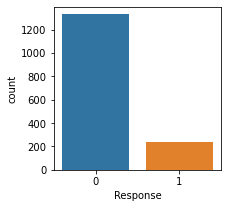

In [10]:
# plot distribution
plt.figure(figsize=(3,3))
sns.countplot(train['Response'])
plt.show()

The unbalance data can result in a biased prediction. This will be handled later in this notebook

In [12]:
train.Education_Level.unique()

array(['Graduation', '2n Cycle', 'Master', 'PhD', 'Basic'], dtype=object)

In [13]:
train.Education_Level.value_counts()

Graduation    802
PhD           340
Master        246
2n Cycle      142
Basic          38
Name: Education_Level, dtype: int64

In [14]:
# rename values
train['Education_Level']=train['Education_Level'].replace("Graduation", "Secondary")
train['Education_Level']=train['Education_Level'].replace("2n Cycle", "Bachelor's")

In [15]:
# check again
train.Education_Level.value_counts()

Secondary     802
PhD           340
Master        246
Bachelor's    142
Basic          38
Name: Education_Level, dtype: int64

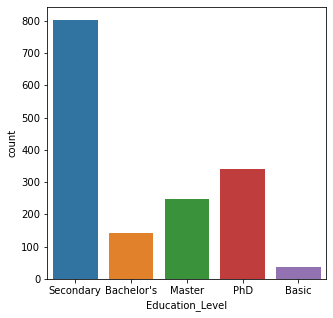

In [16]:
# plot distribution of education level
plt.figure(figsize=(5,5))
sns.countplot(train['Education_Level'])
plt.show()

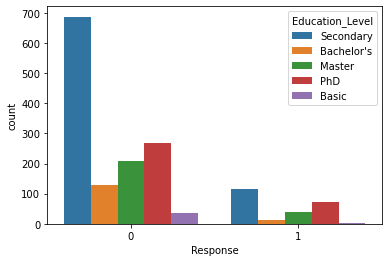

In [17]:
# seeing if education level affects response to marketing campaign
sns.countplot(x='Response', hue='Education_Level', data = train)
plt.show()

In [18]:
train.Marital_Status.unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
train['Marital_Status']=train['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], "Single")
train['Marital_Status']=train['Marital_Status'].replace('Together', 'Engaged') 

In [20]:
train.Marital_Status.unique()

array(['Divorced', 'Engaged', 'Single', 'Married', 'Widow'], dtype=object)

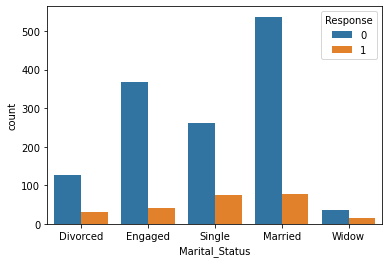

In [21]:
# plot relationship status with response to campaign
sns.countplot(x ='Marital_Status', hue = "Response", data = train)
plt.show()

# Handling missing values

In [22]:
train=train.dropna()

In [23]:
# see if the column till has missing values
train.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

# Transforming Categorical data

In [24]:
train.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
Response                     int64
dtype: object

In [25]:
train = pd.get_dummies(train, columns=['Marital_Status','Education_Level'])

In [26]:
# drop uneccessary columns
train.dtypes

ID                             object
Year_of_Birth                   int64
Disposable_Income             float64
No_of_Kids_in_home              int64
No_of_Teen_in_home              int64
Date_Customer                  object
Recency                         int64
Discounted_Purchases            int64
WebPurchases                    int64
CatalogPurchases                int64
StorePurchases                  int64
Amount_on_Wines                 int64
Amount_on_Fruits                int64
Amount_on_MeatProducts          int64
Amount_on_FishProducts          int64
Amount_on_SweetProducts         int64
Amount_on_GoldProds             int64
WebVisitsMonth                  int64
Cmp3Accepted                    int64
Cmp4Accepted                    int64
Cmp5Accepted                    int64
Cmp1Accepted                    int64
Cmp2Accepted                    int64
Any_Complain                    int64
Response                        int64
Marital_Status_Divorced         uint8
Marital_Stat

In [27]:
# feature selection
train = train.drop(['ID','Year_of_Birth','No_of_Teen_in_home', 'Date_Customer', 
                       'Recency','Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 
                       'Cmp1Accepted','Cmp2Accepted'],axis=1)

In [28]:
train.shape

(1552, 25)

# Modeling

In [29]:
# importing scikit modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [30]:
# assigning independet feature and dependent feature
X = train.drop(['Response'], axis=1)
y = train['Response']

In [31]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
print((X_train.shape), (X_test.shape), (y_train.shape), (y_test.shape))

(1086, 24) (466, 24) (1086,) (466,)


In [33]:
y_train.value_counts()

0    916
1    170
Name: Response, dtype: int64

In [34]:
y.value_counts()

0    1314
1     238
Name: Response, dtype: int64

# Balancing data

Resource: https://towardsdatascience.com/machine-learning-target-feature-label-imbalance-problem-and-solutions-98c5ae89ad0

In [38]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [35]:
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

In [37]:
# make imbalance
X_train_1, y_train_1 = make_imbalance(X_train, y_train , sampling_strategy={0: 170, 1: 170},random_state=0)

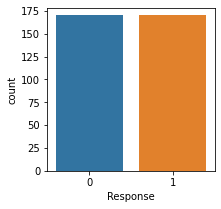

In [38]:
# plot value distribution with make imbalance
plt.figure(figsize=(3,3))
sns.countplot(y_train_1)
plt.show()

In [40]:
# smote
smote = SMOTE(random_state = 0)
X_train_2, y_train_2 = smote.fit_resample(X_train, y_train)

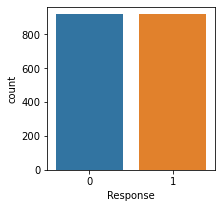

In [41]:
# plot value distribution with smote
plt.figure(figsize=(3,3))
sns.countplot(y_train_2)
plt.show()

In [42]:
# instantiate models
dt =DecisionTreeClassifier()
rf =RandomForestClassifier()
lr =LogisticRegression()

In [43]:
def classification(X_train, X_test, y_train, y_test, model):    
    
    model.fit(X_train,y_train)
    preds = model.predict(X_test)

    print('Accuracy score => ', accuracy_score(y_test,preds))
    print(classification_report(y_test,preds))

## Original split

In [44]:
# Logistic Regression
classification(X_train, X_test, y_train, y_test,lr)

Accuracy score =>  0.851931330472103
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       398
           1       0.46      0.09      0.15        68

    accuracy                           0.85       466
   macro avg       0.66      0.54      0.53       466
weighted avg       0.80      0.85      0.81       466



In [45]:
# Decision Tree Classifier
classification(X_train, X_test, y_train, y_test,dt)

Accuracy score =>  0.8154506437768241
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       398
           1       0.39      0.46      0.42        68

    accuracy                           0.82       466
   macro avg       0.65      0.67      0.65       466
weighted avg       0.83      0.82      0.82       466



In [46]:
# Random Forest Classifier
classification(X_train, X_test, y_train, y_test,rf)

Accuracy score =>  0.8562231759656652
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       398
           1       0.53      0.15      0.23        68

    accuracy                           0.86       466
   macro avg       0.70      0.56      0.58       466
weighted avg       0.82      0.86      0.82       466



### Summary of prediction report on normal split

In terms of accuracy, random forest of course performed better than decision tree model, 
with a few number above the logistic regression model.

        Random Forest => 86%

        Logistic Regression => 85%

        Decision Tree => 82%

The recall and Precision of the random forest model is also higher compared to decision tree and logistic regresion,
ultimately leading to a higher f1_score as well.

## Make Imbalance

In [47]:
# Logistic Regression
classification(X_train_1, X_test, y_train_1, y_test,lr)

Accuracy score =>  0.7489270386266095
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       398
           1       0.31      0.60      0.41        68

    accuracy                           0.75       466
   macro avg       0.62      0.69      0.63       466
weighted avg       0.83      0.75      0.78       466



In [48]:
# Decision Tree Classifier
classification(X_train_1, X_test, y_train_1, y_test,dt)

Accuracy score =>  0.7274678111587983
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       398
           1       0.29      0.59      0.39        68

    accuracy                           0.73       466
   macro avg       0.60      0.67      0.61       466
weighted avg       0.82      0.73      0.76       466



In [49]:
# Random Forest Classifier
classification(X_train_1, X_test, y_train_1, y_test,rf)

Accuracy score =>  0.7060085836909872
              precision    recall  f1-score   support

           0       0.93      0.71      0.80       398
           1       0.29      0.71      0.41        68

    accuracy                           0.71       466
   macro avg       0.61      0.71      0.61       466
weighted avg       0.84      0.71      0.75       466



### Summary of prediction report on make_imbalance split
 
In terms of accuracy, random forest did not perform as well as expected. The decision tree model, 
with a few numbers below the logistic regression model.

        Logistic Regression => 75%

        Decision Tree => 73%
       
        Random Forest => 71%

The recall and Precision of the logistic regression model resulted in a higher f1_score despite the high precision score of Random forest model. 
Over all, the 3 models did not perform too poorly.

## Smote

In [50]:
# Logistic Regression
classification(X_train_2, X_test, y_train_2, y_test,lr)

Accuracy score =>  0.7317596566523605
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       398
           1       0.30      0.62      0.40        68

    accuracy                           0.73       466
   macro avg       0.61      0.68      0.61       466
weighted avg       0.83      0.73      0.77       466



In [51]:
# Decision Tree Classifier
classification(X_train_2, X_test, y_train_2, y_test,dt)

Accuracy score =>  0.7660944206008584
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       398
           1       0.28      0.40      0.33        68

    accuracy                           0.77       466
   macro avg       0.59      0.61      0.59       466
weighted avg       0.80      0.77      0.78       466



In [52]:
# Random Forest Classifier
classification(X_train_2, X_test, y_train_2, y_test,rf)

Accuracy score =>  0.8454935622317596
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       398
           1       0.46      0.38      0.42        68

    accuracy                           0.85       466
   macro avg       0.68      0.65      0.67       466
weighted avg       0.83      0.85      0.84       466



### Summary of prediction report on SMOTE split
 
Random forest model gave the highest accuracy score. Logistic regression did not perform as well as expected. The decision tree model, 
gave an unexpected accuracy score as it is higher than that of the logistic regression model.

        Logistic Regression => 73%

        Decision Tree => 77%
       
        Random Forest => 85%

The recall and Precision of the random forest model is also the highest of all three.
The 3 models performed well on the data.

# Run the model that has the highest accuracy on the testing data

In [53]:
test = pd.read_csv('respondent_test_dataset.csv')

In [54]:
test.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain'],
      dtype='object')

In [74]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [75]:
test.shape

(672, 26)

In [55]:
# drop missing values
test=test.dropna()
testdf=test.copy()

In [77]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [78]:
test.dtypes

ID                          object
Year_of_Birth                int64
Education_Level             object
Marital_Status              object
Disposable_Income          float64
No_of_Kids_in_home           int64
No_of_Teen_in_home           int64
Date_Customer               object
Recency                      int64
Discounted_Purchases         int64
WebPurchases                 int64
CatalogPurchases             int64
StorePurchases               int64
Amount_on_Wines              int64
Amount_on_Fruits             int64
Amount_on_MeatProducts       int64
Amount_on_FishProducts       int64
Amount_on_SweetProducts      int64
Amount_on_GoldProds          int64
WebVisitsMonth               int64
Cmp3Accepted                 int64
Cmp4Accepted                 int64
Cmp5Accepted                 int64
Cmp1Accepted                 int64
Cmp2Accepted                 int64
Any_Complain                 int64
dtype: object

In [56]:
test.Marital_Status.unique()

array(['Single', 'Widow', 'Married', 'Together', 'Divorced', 'Absurd'],
      dtype=object)

In [57]:
# rename values
test['Marital_Status']=test['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], "Single")
test['Marital_Status']=test['Marital_Status'].replace('Together', 'Engaged') 

In [58]:
test.Education_Level.unique()

array(['Graduation', 'Basic', 'Master', '2n Cycle', 'PhD'], dtype=object)

In [59]:
test['Education_Level']=test['Education_Level'].replace("Graduation", "Secondary")
test['Education_Level']=test['Education_Level'].replace("2n Cycle", "Bachelor's")

In [60]:
# get dummy for cat columns
test = pd.get_dummies(test, columns=['Marital_Status','Education_Level'])

In [61]:
# feature selection
test = test.drop(['ID','Year_of_Birth','No_of_Teen_in_home', 'Date_Customer', 
                       'Recency','Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 
                       'Cmp1Accepted','Cmp2Accepted'],axis=1)

In [62]:
test.shape

(664, 24)

In [63]:
test_predictions = rf.predict(test) #smote split

In [64]:
test_predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [66]:
ID = testdf['ID']
predicted_response = pd.DataFrame({
                  "ID": ID, 
                  "Response": test_predictions})

In [67]:
predicted_response.Response.value_counts()

0    589
1     75
Name: Response, dtype: int64

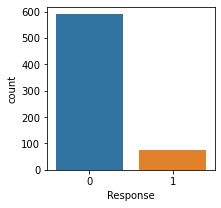

In [68]:
# plot distribution
plt.figure(figsize=(3,3))
sns.countplot(predicted_response['Response'])
plt.show()

In [69]:
# export predictions to external csv file
predicted_response.to_csv('predicted_response.csv', index=False)

# Overview

There was need to make the data balanced, distribution-wise - to prevent bias. make_imbalance and SMOTE functions were used to balance the target variable. The data balance with SMOTE worked better with the modles compared to make_imbalance. 

The unbalance data did provide the highest range of accuracy, but the result would have been biased as the will definately value one class above the other. 

For the testing data the random forest model (the last instance of rf - random forest - model used) which was used to fit the SMOTE data was used as the prediction model. Even though the traget class scale is still imbalanced, we know the prediction is not biased.